<a href="https://colab.research.google.com/github/nicolecostt/projeto_nucleo_dados/blob/main/C%C3%B3pia_de_Nucleo_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Análise de Dados - [Uber Dataset](https://docs.google.com/spreadsheets/d/1tJniGsIzics-wNVCuGsXIHw6Vdykqe1b5bSk1zlVR3M/edit?usp=drive_link)

O projeto será divido em duas etapas:

**1 - Exploração dos Dados (EDA):**

Cada trilhete deverá explorar o dataset fornecido, gerar análises e visualizações e formular no mínimo 3 perguntas sobre os dados.

**2 - Modelagem Preditiva (Machine Learning):**

A partir das perguntas formuladas, cada trilhete deverá escolher pelo menos uma pergunta e tentar respondê-la utilizando técnicas de machine learning.

## Primeira Etapa (EDA):

**O que vocês devem fazer:**

1- Carregar o dataset no Python (pandas).

2- Explorar as primeiras linhas, dimensões e tipos de dados.

3- Tratar valores ausentes e inconsistências.

4- Gerar estatísticas descritivas (média, mediana, desvio-padrão, etc.).

5- Criar visualizações:

5.1- Histogramas, boxplots, gráficos de barras, heatmap de correlação.

5.2- Comparar distribuições (ex.: corridas canceladas vs concluídas).


**O que vocês devem entregar:**

Link do repositório do github contendo o notebook (Projeto_EDA_Trilha.ipynb)

No final da EDA: 3 perguntas interessantes sobre o dataset (ex.: "Clientes com altas taxas de cancelamento tem notas mais baixas?")

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import csv
import io

caminho_do_arquivo = '/ncr_ride_bookings - ncr_ride_bookings.csv.csv'
dataset = pd.read_csv(caminho_do_arquivo)
dataset.columns = dataset.columns.str.strip()
print(dataset.head())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
dataset.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [7]:
dataset.isnull().sum()

,0
Date,0
Time,0
Booking ID,0
Booking Status,0
Customer ID,0
Vehicle Type,0
Pickup Location,0
Drop Location,0
Avg VTAT,10500
Avg CTAT,48000


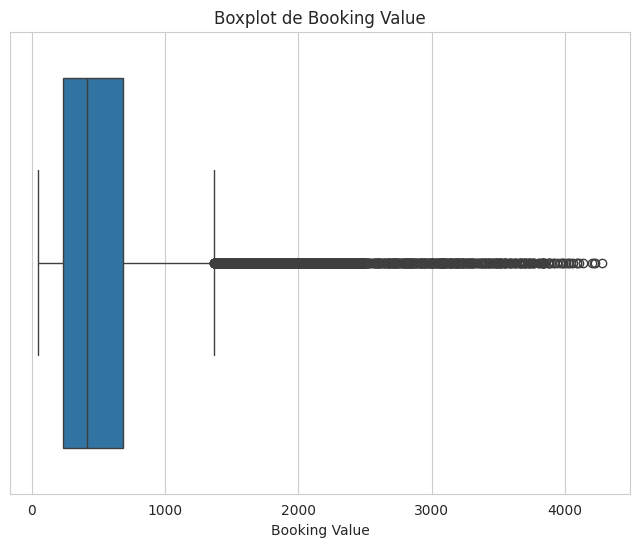

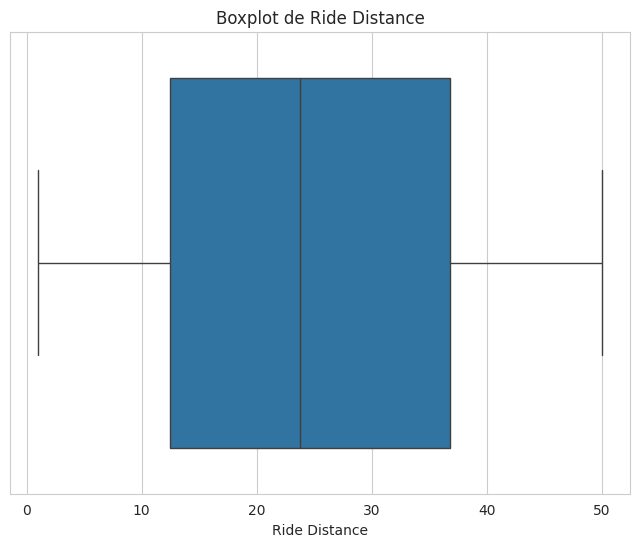

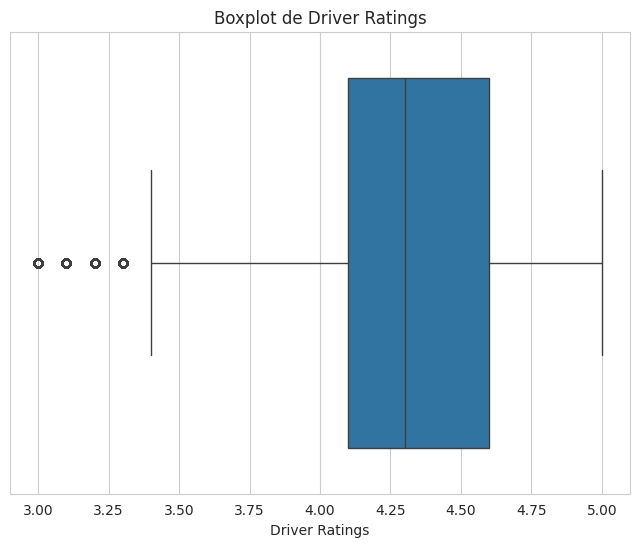

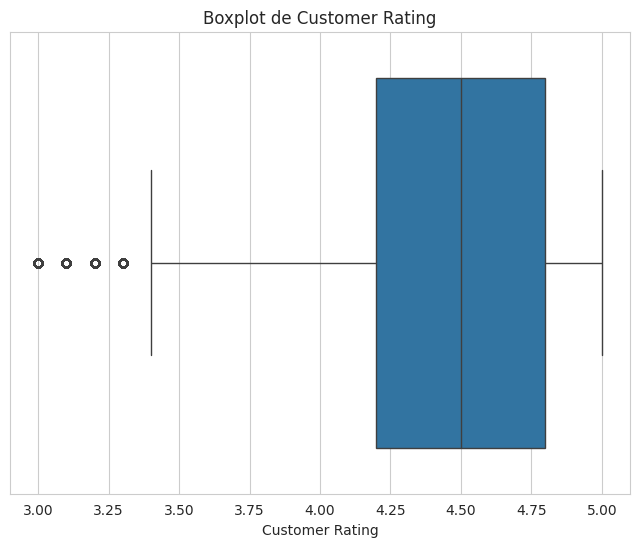

In [19]:
numerical_cols = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.savefig(f'boxplot_{col.replace(" ", "_")}.png')
    plt.show()


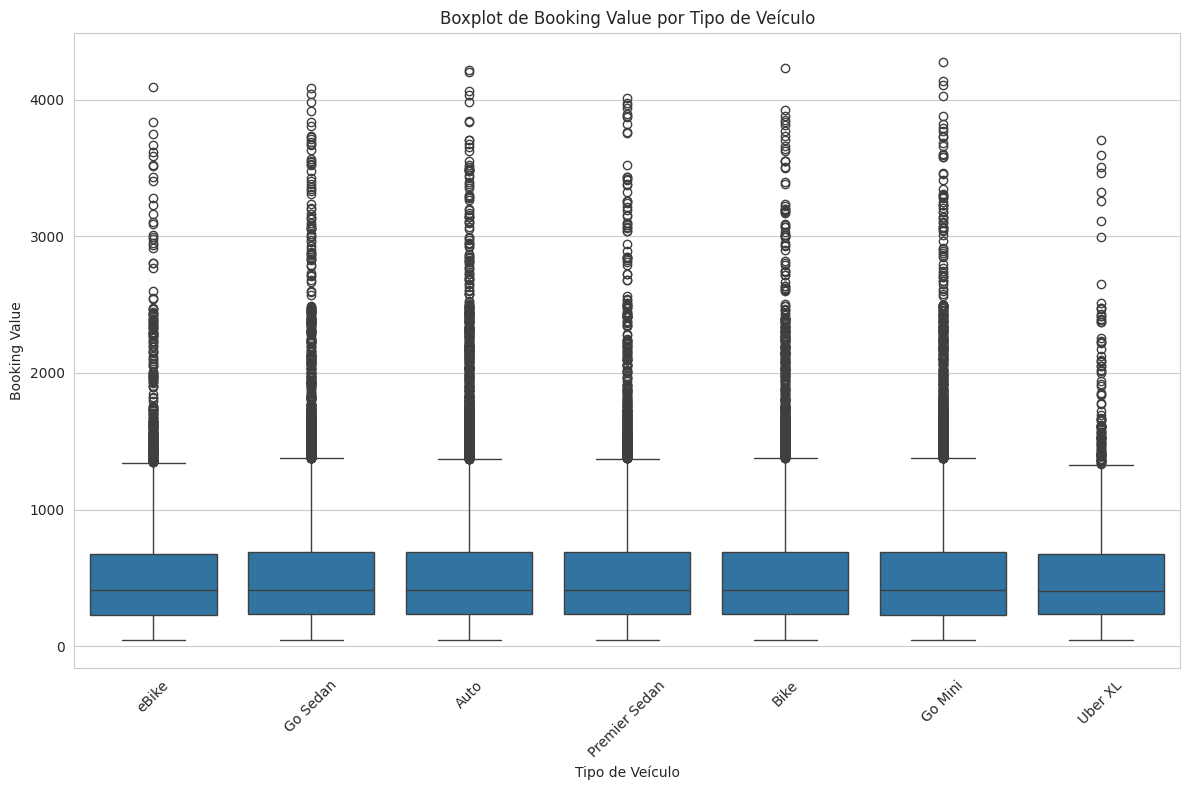

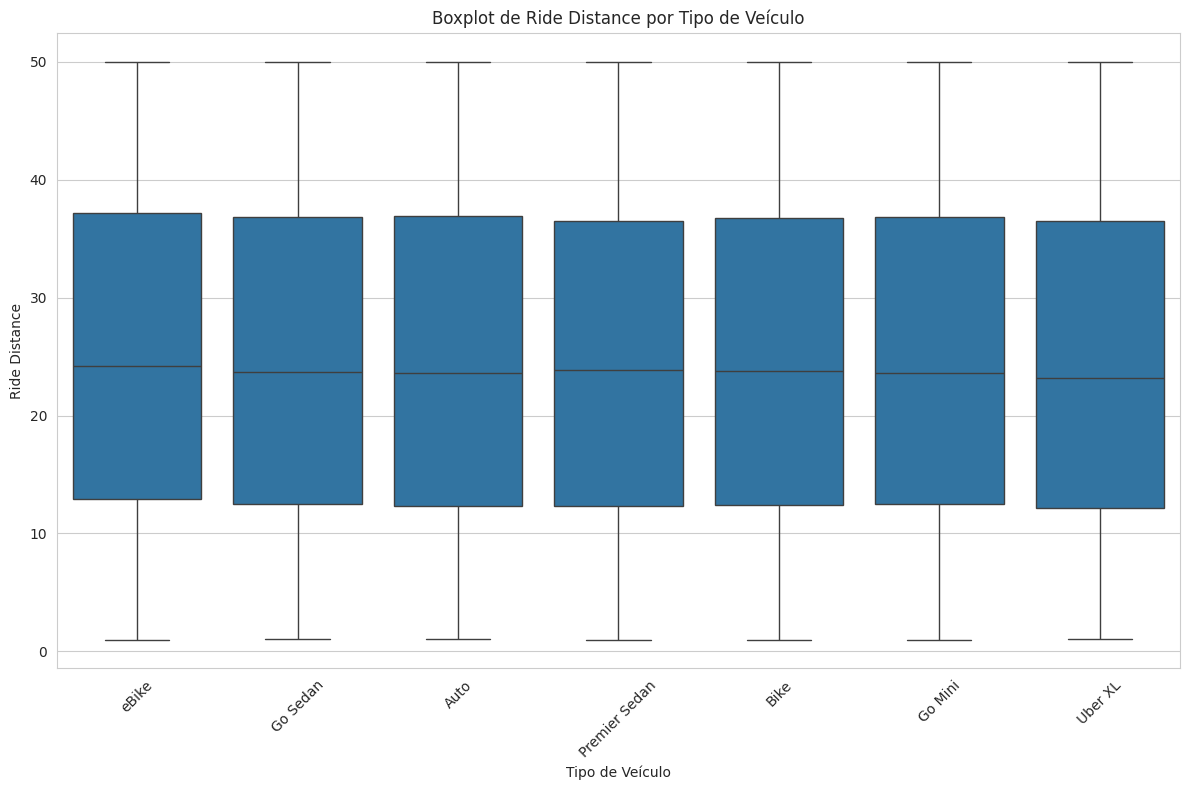

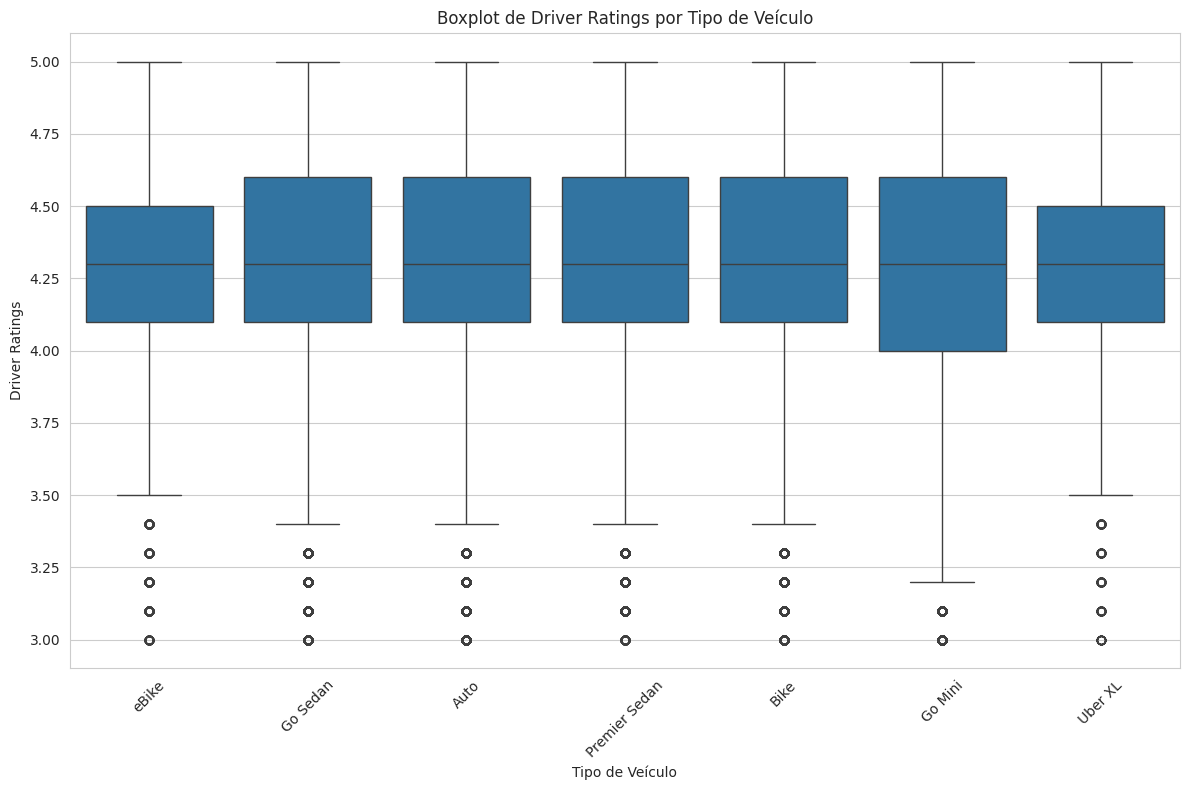

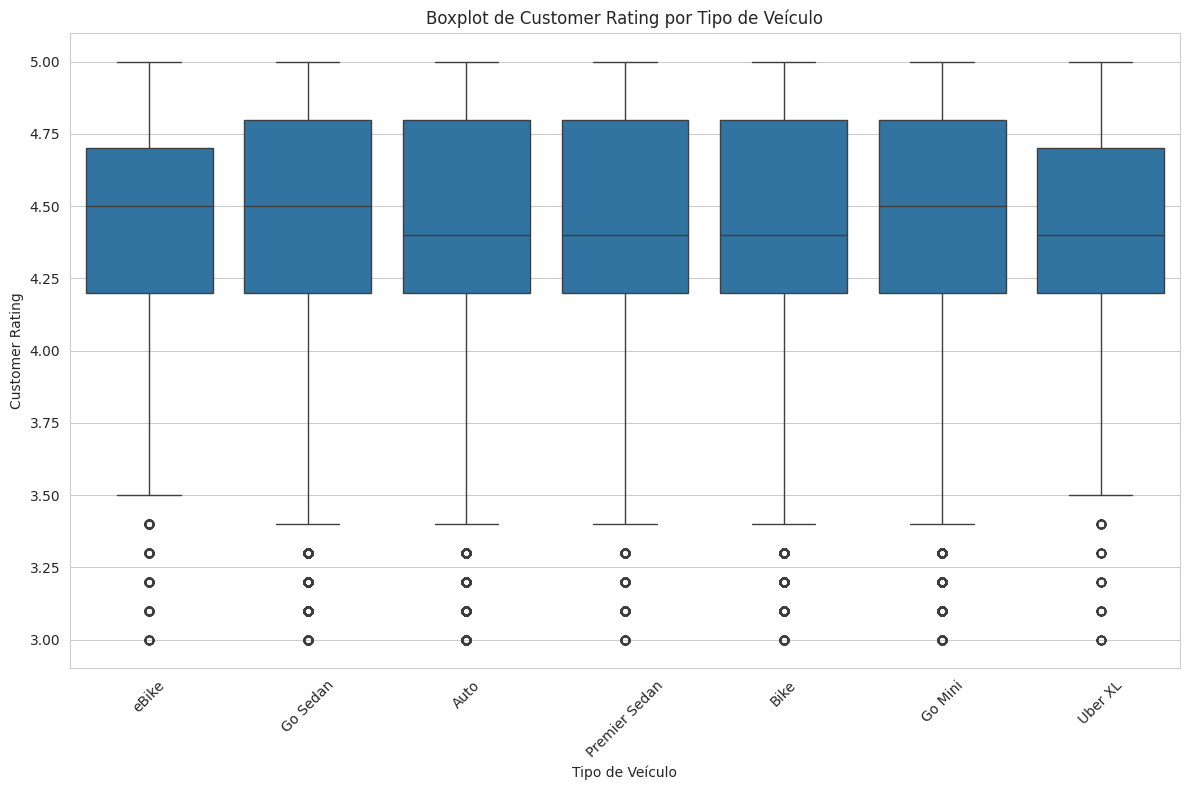

In [21]:
for col in numerical_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Vehicle Type', y=col, data=df)
    plt.title(f'Boxplot de {col} por Tipo de Veículo')
    plt.xlabel('Tipo de Veículo')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'boxplot_{col.replace(" ", "_")}_by_Vehicle_Type.png')
    plt.show()

In [23]:
dataset['Booking ID'] = dataset['Booking ID'].str.replace('"', '')
dataset['Customer ID'] = dataset['Customer ID'].str.replace('"', '')

try:
    dataset['BookingTimestamp'] = pd.to_datetime(dataset['Date'] + ' ' + dataset['Time'], format='%Y-%m-%d %H:%M:%S')
    dataset.drop(['Date', 'Time'], axis=1, inplace=True)
except Exception as e:
    print(f"Erro ao converter data e hora: {e}")

duplicates_before = dataset.duplicated().sum()
print(f"\nEncontradas {duplicates_before} linhas duplicadas.")
dataset.drop_duplicates(inplace=True)

dataset_completed = dataset[dataset['Booking Status'] == 'Completed'].copy()

dataset_completed.dropna(
    subset=['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating'],
    inplace=True
)

print("\n2. Informações do Dataset Limpo (Apenas Corridas Completas)")
print(f"Formato do dataset limpo: {dataset_completed.shape}")
print("\nContagem de valores nulos por coluna (depois):")

print(dataset_completed.isnull().sum())
print("-" * 60)

print("\nPré-visualização dos dados limpos:")
print(dataset_completed.head())

Erro ao converter data e hora: 'Date'

Encontradas 0 linhas duplicadas.

2. Informações do Dataset Limpo (Apenas Corridas Completas)
Formato do dataset limpo: (93000, 20)

Contagem de valores nulos por coluna (depois):
Booking ID                               0
Booking Status                           0
Customer ID                              0
Vehicle Type                             0
Pickup Location                          0
Drop Location                            0
Avg VTAT                                 0
Avg CTAT                                 0
Cancelled Rides by Customer          93000
Reason for cancelling by Customer    93000
Cancelled Rides by Driver            93000
Driver Cancellation Reason           93000
Incomplete Rides                     93000
Incomplete Rides Reason              93000
Booking Value                            0
Ride Distance                            0
Driver Ratings                           0
Customer Rating                          0
Payment

/tmp/ipython-input-1318969467.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HourOfDay', data=dataset_completed, palette='viridis')


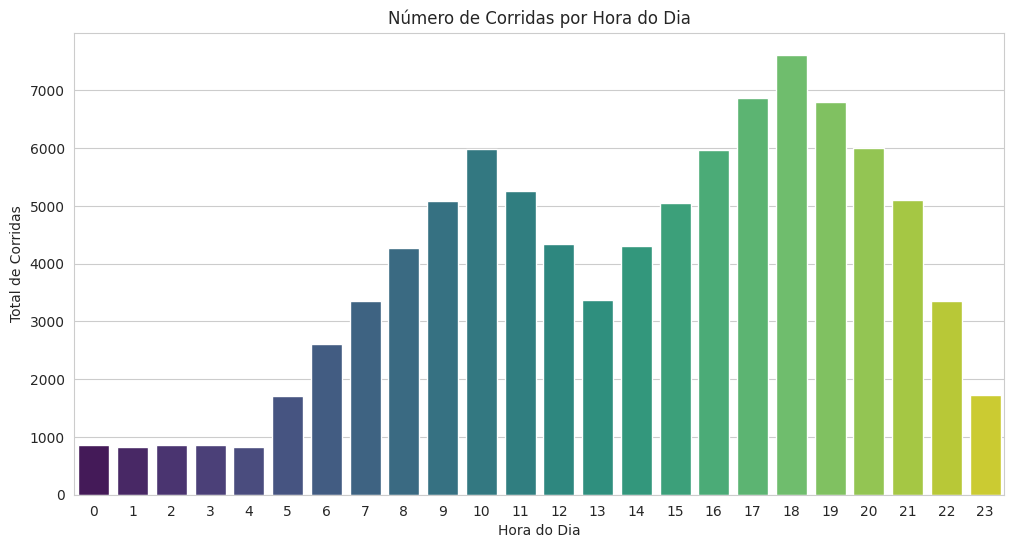

In [24]:
dataset_completed['BookingTimestamp'] = pd.to_datetime(dataset_completed['BookingTimestamp'])

dataset_completed['HourOfDay'] = dataset_completed['BookingTimestamp'].dt.hour
dataset_completed['DayOfWeek'] = dataset_completed['BookingTimestamp'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=dataset_completed, palette='viridis')
plt.title('Número de Corridas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Total de Corridas')
plt.savefig('corridas_por_hora.png')
plt.show()

/tmp/ipython-input-1800730335.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=dataset_completed, order=day_order, palette='magma')


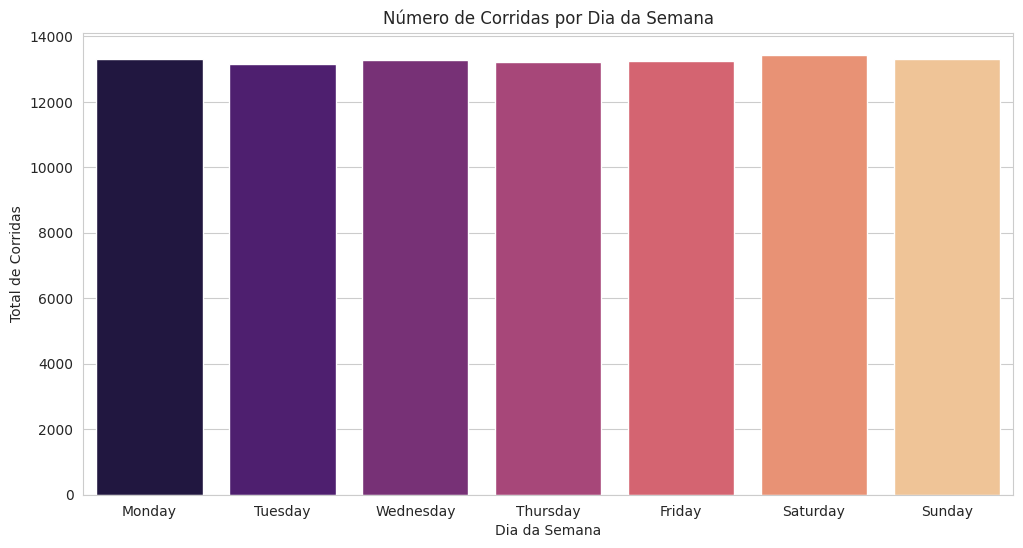

In [25]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=dataset_completed, order=day_order, palette='magma')
plt.title('Número de Corridas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Corridas')
plt.savefig('corridas_por_dia_semana.png')
plt.show()

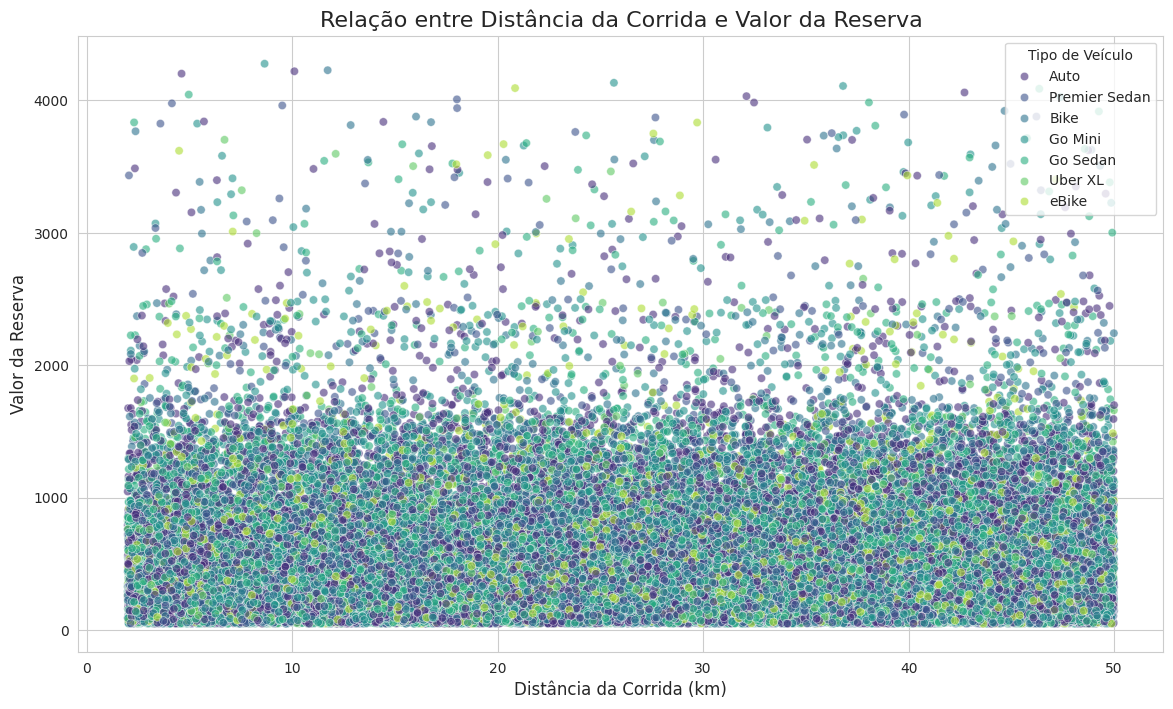

In [26]:
plt.figure(figsize=(14, 8))

sns.scatterplot(
    data=dataset_completed,
    x='Ride Distance',
    y='Booking Value',
    hue='Vehicle Type',
    alpha=0.6,
    palette='viridis'
)

plt.title('Relação entre Distância da Corrida e Valor da Reserva', fontsize=16)
plt.xlabel('Distância da Corrida (km)', fontsize=12)
plt.ylabel('Valor da Reserva', fontsize=12)
plt.legend(title='Tipo de Veículo')
plt.grid(True)
plt.savefig('distancia_vs_valor.png')
plt.show()

/tmp/ipython-input-1598802705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_pickups.values, y=top_15_pickups.index, palette='coolwarm')


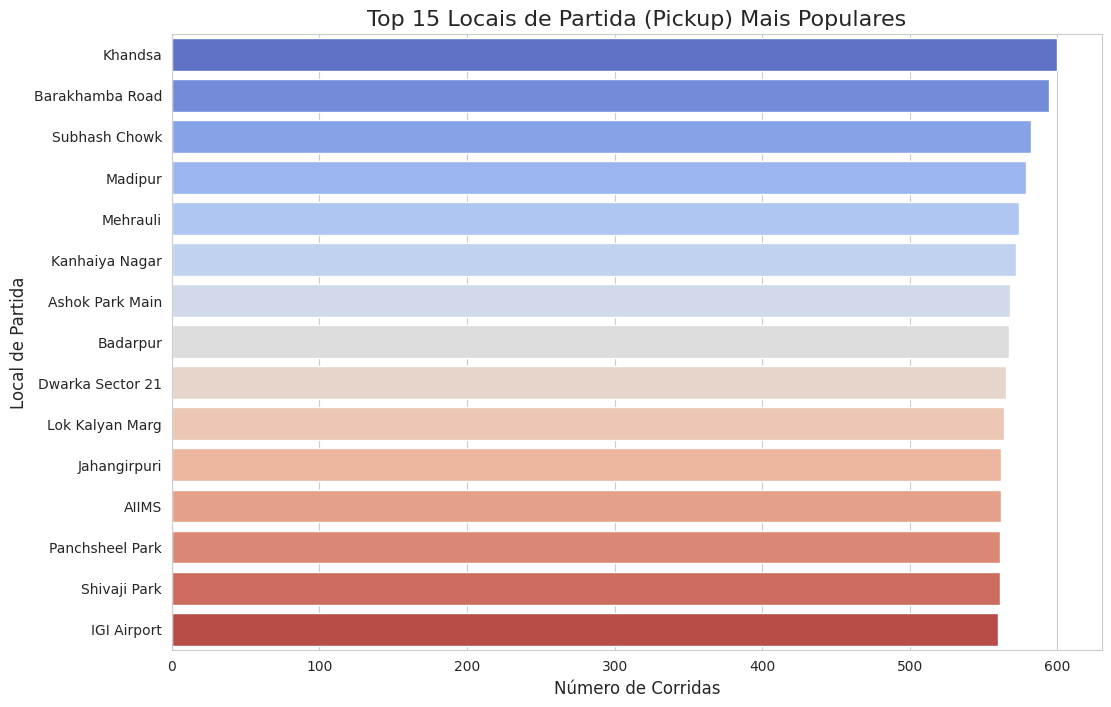

/tmp/ipython-input-1598802705.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_drops.values, y=top_15_drops.index, palette='coolwarm_r')


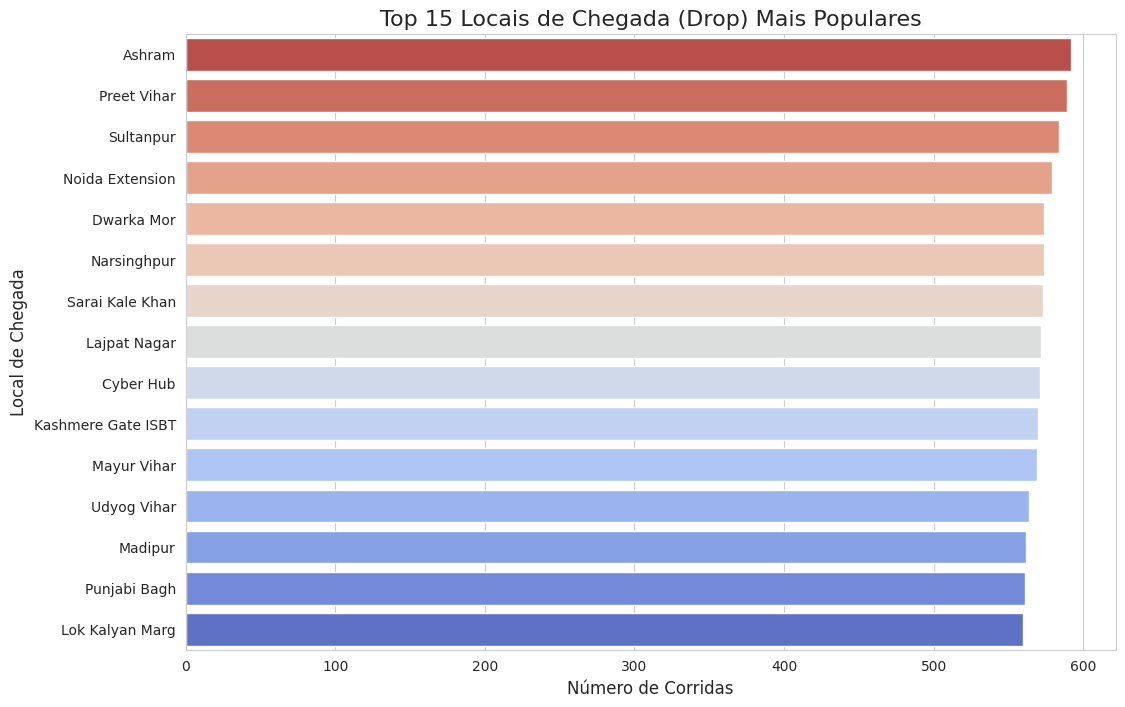

In [27]:
top_15_pickups = dataset_completed['Pickup Location'].value_counts().nlargest(15)

top_15_drops = dataset_completed['Drop Location'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_pickups.values, y=top_15_pickups.index, palette='coolwarm')
plt.title('Top 15 Locais de Partida (Pickup) Mais Populares', fontsize=16)
plt.xlabel('Número de Corridas', fontsize=12)
plt.ylabel('Local de Partida', fontsize=12)
plt.savefig('top_pickups.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_drops.values, y=top_15_drops.index, palette='coolwarm_r')
plt.title('Top 15 Locais de Chegada (Drop) Mais Populares', fontsize=16)
plt.xlabel('Número de Corridas', fontsize=12)
plt.ylabel('Local de Chegada', fontsize=12)
plt.savefig('top_drops.png')
plt.show()

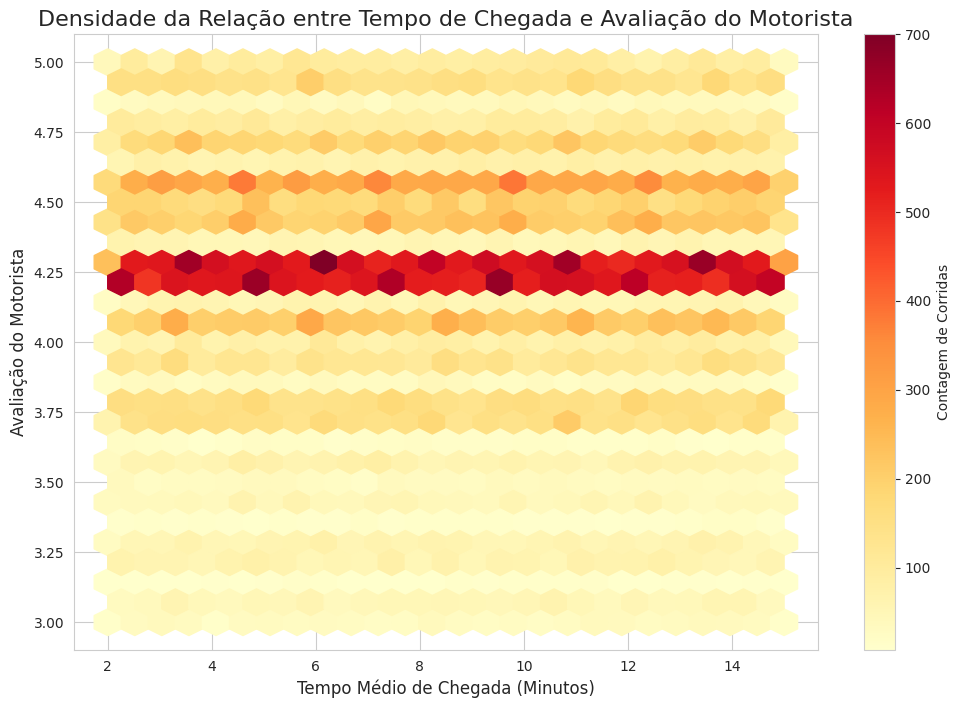

In [28]:
dataset_filtered = dataset_completed[dataset_completed['Avg VTAT'] <= 30]

plt.figure(figsize=(12, 8))

plt.hexbin(
    x=dataset_filtered['Avg VTAT'],
    y=dataset_filtered['Driver Ratings'],
    gridsize=25,
    cmap='YlOrRd'
)

plt.title('Densidade da Relação entre Tempo de Chegada e Avaliação do Motorista', fontsize=16)
plt.xlabel('Tempo Médio de Chegada (Minutos)', fontsize=12)
plt.ylabel('Avaliação do Motorista', fontsize=12)
cb = plt.colorbar()
cb.set_label('Contagem de Corridas')

plt.savefig('vatt_vs_rating.png')
plt.show()

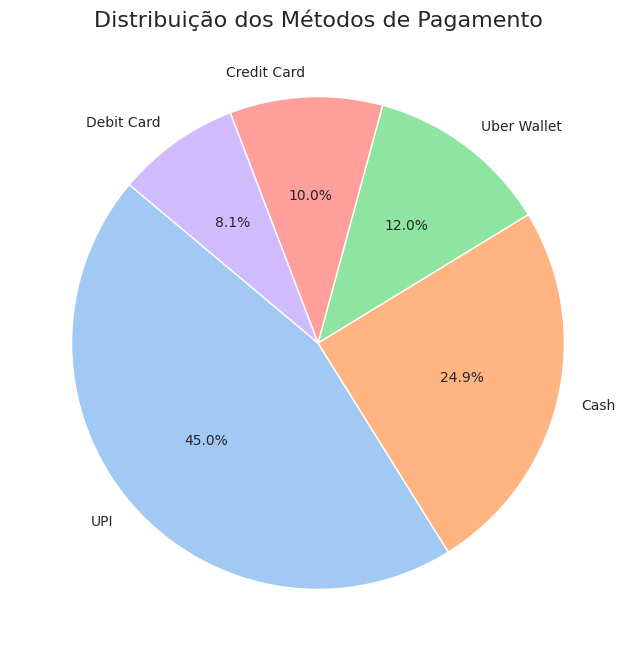

/tmp/ipython-input-4091128031.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


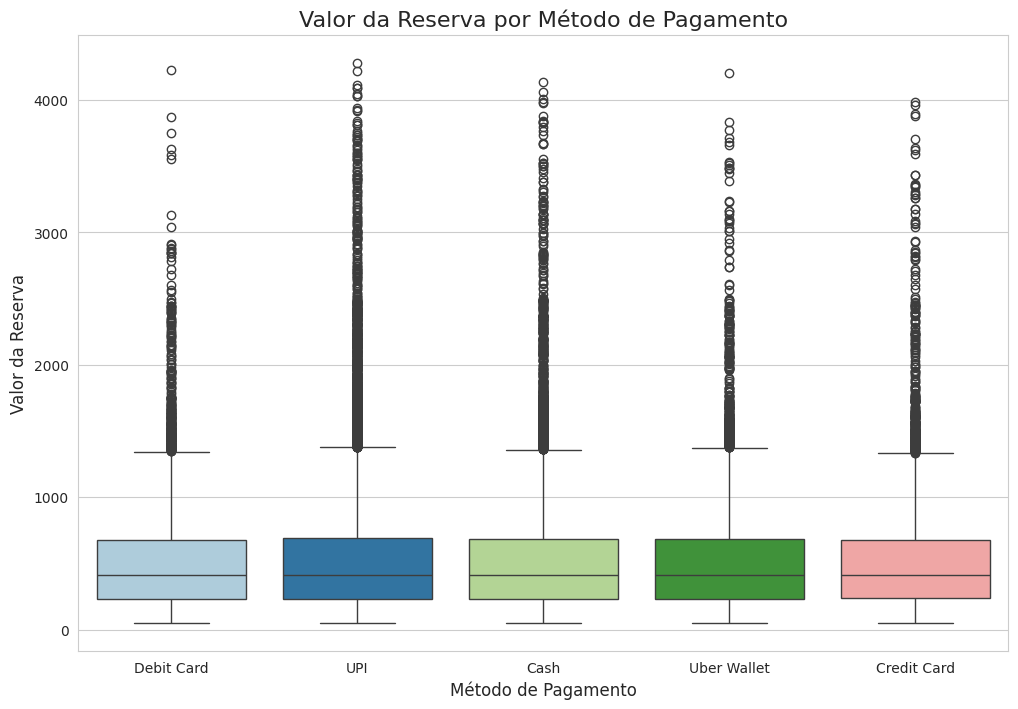

In [29]:
payment_counts = dataset_completed['Payment Method'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Distribuição dos Métodos de Pagamento', fontsize=16)
plt.ylabel('')
plt.savefig('payment_distribution.png')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(
    x='Payment Method',
    y='Booking Value',
    data=dataset_completed,
    palette='Paired'
)
plt.title('Valor da Reserva por Método de Pagamento', fontsize=16)
plt.xlabel('Método de Pagamento', fontsize=12)
plt.ylabel('Valor da Reserva', fontsize=12)
plt.savefig('payment_vs_value.png')
plt.show()

## Segunda Etapa (Modelagem preditiva)

**O que vocês devem fazer:**

1- Escolher pelo menos uma das 3 perguntas formuladas na Etapa 1.

2- Definir a variável alvo (y) e as variáveis preditoras (X).

3- Preparar os dados:

3.1- Normalizar/transformar variáveis numéricas.

3.2- Codificar variáveis categóricas.

4- Separar treino e teste.

5- Treinar um ou mais modelos de machine learning (Scikit-learn).

6- Avaliar o modelo com métricas adequadas

**O que vocês devem entregar:**

Link do repositório do projeto

Resposta (mesmo que parcial) à pergunta.